In [2]:
def convert_normal(v_x,v_y):
    v_x_unit = (v_x/((v_x*v_x + v_y*v_y)**(1/2)))
    v_y_unit = (v_y/((v_x*v_x + v_y*v_y)**(1/2)))
    return v_x_unit, v_y_unit

In [3]:
def convert_normal_3d(v_s,v_x,v_y):
    vs_unit = (v_s/((v_x*v_x + v_y*v_y + v_s*v_s)**(1/2)))
    v_x_unit = (v_x/((v_x*v_x + v_y*v_y + v_s*v_s)**(1/2)))
    v_y_unit = (v_y/((v_x*v_x + v_y*v_y  + v_s*v_s)**(1/2)))
    return vs_unit,v_x_unit, v_y_unit

In [4]:
def mag_vect(perp_wall):
    mag = np.sqrt((perp_wall[0]*perp_wall[0])+(perp_wall[1] * perp_wall[1]))
    return mag

In [15]:
def ngon(n):
    table = []
    tab_x = []
    tab_y = []
    table.append([0,0,np.sin((2 * math.pi)/n),np.cos((2 * math.pi)/n), -1*np.sin((n-2)/(2*n)),
                  np.cos((n-2)/(2*n))])
    tab_x.append(table[0][0])
    tab_y.append(table[0][1])
    tab_x.append(table[0][2])
    tab_y.append(table[0][3])
    for i in range(1,n+1):
        new_walls = [np.sin((i * 2 * math.pi)/n),np.cos((i*2 * math.pi)/n)
                     , np.sin((i+1)*2*math.pi/n), np.cos((i+1)*2*math.pi/n)
                  ,(np.sin((i+1)*2*math.pi/n)-np.sin((i)*2*math.pi/n)),
                     np.cos((i+1)*2*math.pi/n)-np.cos((i)*2*math.pi/n)]
        table.append(new_walls)
        tab_x.append(new_walls[0])
        tab_y.append(new_walls[1])
        tab_x.append(new_walls[2])
        tab_y.append(new_walls[3])
    return table,tab_x,tab_y

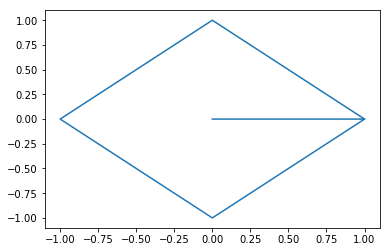

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math
table,tab_x, tab_y = ngon(4)
plt.plot(tab_x,tab_y)
plt.show()

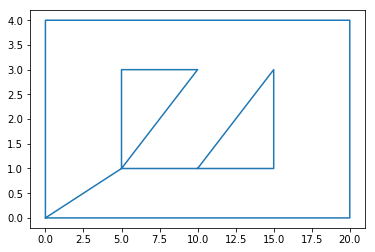

In [22]:
import matplotlib.pyplot as plt
tab_x = []
tab_y = []
table = [[0,0,0,4,0,4],[0,4,20,4,20,0],[20,4,20,0,0,-4],[20,0,0,0,-20,0],
         [5,1,5,3,0,2],[5,3,10,3,5,0],[10,3,5,1,-5,-2],
        [10,1,15,3,5,2],[15,3,15,1,0,-2],[15,1,10,1,-5,0]]
for i in table:
    tab_x.append(i[0])
    tab_x.append(i[2])
    tab_y.append(i[1])
    tab_y.append(i[3])
plt.plot(tab_x, tab_y)
plt.show()

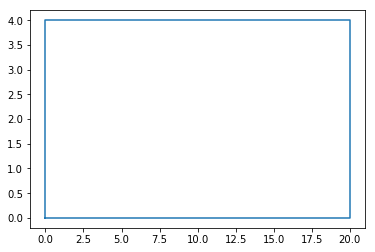

In [5]:
import matplotlib.pyplot as plt
tab_x = []
tab_y = []
table = [[0,0,0,4,0,4],[0,4,20,4,20,0],[20,4,20,0,0,-4],[20,0,0,0,-20,0]]
for i in table:
    tab_x.append(i[0])
    tab_x.append(i[2])
    tab_y.append(i[1])
    tab_y.append(i[3])
plt.plot(tab_x, tab_y)
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
import math
def cal_dist(table):
    wall_dist = []
    for i in table:
        x_diff = (i[2] - i[0]) ** 2
        y_diff = (i[3] - i[1]) ** 2
        dist = math.sqrt(x_diff+y_diff)
        wall_dist.append(dist)
    return wall_dist

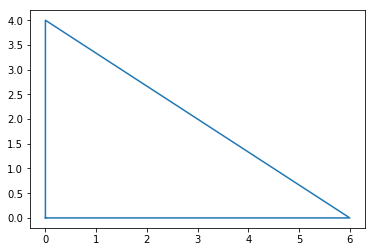

In [260]:
import matplotlib.pyplot as plt
tab_x = []
tab_y = []
table = [[0,0,0,4,0,4],[0,4,6,0,6,-4],[6,0,0,0,-6,0]]
for i in table:
    tab_x.append(i[0])
    tab_x.append(i[2])
    tab_y.append(i[1])
    tab_y.append(i[3])
plt.plot(tab_x, tab_y)
plt.show()

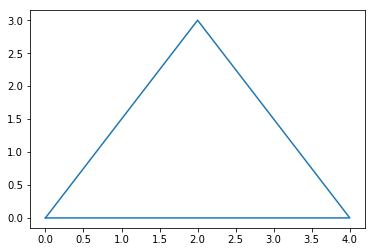

In [262]:
import matplotlib.pyplot as plt
table = [[0,0,2,3,2,3],[2,3,4,0,2,-3],[4,0,0,0,-4,0]]
tab_x = []
tab_y = []
for i in table:
    tab_x.append(i[0])
    tab_x.append(i[2])
    tab_y.append(i[1])
    tab_y.append(i[3])
plt.plot(tab_x, tab_y)
plt.show()

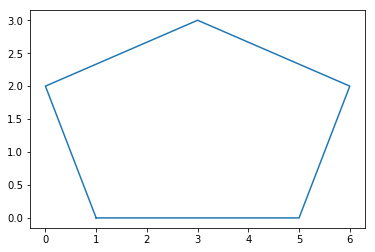

In [289]:
import matplotlib.pyplot as plt
table = [[1,0,0,2,-1,2],[0,2,3,3,3,1],[3,3,6,2,3,-1],[6,2,5,0,-1,-2],[5,0,1,0,-5,0]]
tab_x = []
tab_y = []
for i in table:
    tab_x.append(i[0])
    tab_x.append(i[2])
    tab_y.append(i[1])
    tab_y.append(i[3])
plt.plot(tab_x, tab_y)
plt.show()

In [7]:
def cal_dist(table):
    wall_dist = []
    for i in table:
        x_diff = (i[2] - i[0]) ** 2
        y_diff = (i[3] - i[1]) ** 2
        dist = math.sqrt(x_diff+y_diff)
        wall_dist.append(dist)
    return wall_dist

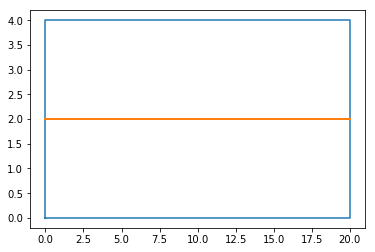

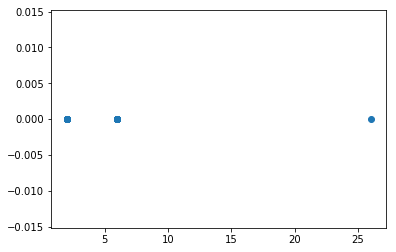

In [8]:

state_list = []
col_state = []
dist_list = []
phi_list = []
wall_dist = cal_dist(table)
num = 60
x_start = 10
y_start = 2
vx,vy = convert_normal(-1,0)
v = np.array([vx,vy])
state_list.append(np.array([x_start,y_start,0,0,0,0,0,0]))
col_state.append([x_start, y_start,v[0],v[1]])
for j in range(num):
    wall = 0
    hit_list = []
    for i in table:
#         print(i)
        wall_eq = []
        vect = []

        if(i[2] - i[0] == 0):
            s = i[0]
            wall_eq.append([1,0,0],)
            wall_eq.append([1,0,-v[0]])
            wall_eq.append([0,1,-v[1]])
#             print(wall_eq.shape())
            vect.append(s)
            vect.append(x_start)
            vect.append(y_start)
        #         print(np.linalg.inv(np.array(wall_eq)))
            try:
                hit = np.matmul(np.linalg.inv(np.array(wall_eq)),np.array(vect))
            except Exception:
                wall = wall + 1
                continue
            if(round(hit[2],10) < 0 or round(hit[2],10) == 0):
                wall = wall + 1
                pass
            elif((hit[0]>max(i[0],i[2])) or (hit[0]<min(i[0],i[2]) )or (hit[1]>max(i[1],i[3])) or (hit[1]<min(i[1],i[3]))):
                pass
            else:
                hit_list.append(np.append(hit,np.array([wall,i[0],i[1],i[-2],i[-1]])))
                wall = wall + 1
        else:
            m = (i[3] - i [1])/(i[2] - i [0])
            x = i[0] 
            y = i[1]
            b= y - m*x
        #         print(b)
            wall_eq.append([-m,1,0])
            wall_eq.append([1,0,-v[0]])
            wall_eq.append([0,1,-v[1]])
            vect.append(b)
            vect.append(x_start)
            vect.append(y_start)
    #         print(np.array(wall_eq))
    #         print(np.array(vect))
            try:
                hit = np.matmul(np.linalg.inv(np.array(wall_eq)),np.array(vect))
#             print(hit)
            except Exception:
                wall = wall + 1
                continue
            if(round(hit[2],10) < 0 or round(hit[2],10) == 0):
                wall = wall + 1
                pass
            elif((hit[0]>max(i[0],i[2])) or (hit[0]<min(i[0],i[2]) )or (hit[1]>max(i[1],i[3])) or (hit[1]<min(i[1],i[3]))):
                pass
            else:
                hit_list.append(np.append(hit,np.array([wall,i[0],i[1],i[-2],i[-1]])))
                wall = wall + 1
#                 print(hit)
    hit_array = np.array(hit_list)
    state = hit_array[np.argmin(hit_array[:,2]),:]
    state_list.append(state)
    wall_dir = state[-2:]
#     print(wall_dir)
    angle = -np.pi/2
    rotat_mat_inward = np.array([np.cos(angle), -np.sin(angle), np.sin(angle), np.cos(angle)]).reshape(2,2)
    rotat_mat_outward = np.array([np.cos(-1 * angle), -np.sin(-1 *angle), np.sin(-1 * angle),\
                                  np.cos(-1 * angle)]).reshape(2,2)
    outward_norm = np.matmul(rotat_mat_outward,wall_dir)
#     print(outward_norm)
    y_axis = np.array([0,1])
    rx = np.round(rotat_mat_outward[0],3)
    ry = np.round(rotat_mat_outward[0],3)
    rotat_mat_outward_cross = [outward_norm[0],outward_norm[1],0]
#     print(rotat_mat_outward)
    y_axis_cross = [y_axis[0], y_axis[1],0]
#     print(rotat_mat_outward_cross)
#     print(y_axis_cross)
    cross = np.cross(rotat_mat_outward_cross,y_axis_cross)
#     print(cross)
    theta = np.arccos((np.dot(outward_norm,y_axis))/(mag_vect(outward_norm) * mag_vect(y_axis)))
    if (cross[2] == 0 or cross[2] > 0 ):
        theta = theta
    else:
        theta = -1* theta
   
    R = np.array([np.cos(theta), np.sin(theta), -np.sin(theta), np.cos(theta)]).reshape(2,2)
    T = np.array([1,0,0,-1]).reshape(2,2)
    R_minus = np.array([np.cos( -theta), np.sin(-theta), -np.sin(-theta), np.cos(-theta)]).reshape(2,2)
    R_time_T = (np.matmul(R,T))
    T_time_R_minus = np.matmul(R_time_T,R_minus)
    v_reflect = np.matmul(T_time_R_minus, v)
    v = v_reflect
#     print(v)
    norm_wall = np.matmul(rotat_mat_inward,wall_dir)
#     print(norm_wall)
    
    nx,ny = convert_normal(norm_wall[0],norm_wall[1])
    normalized_wall = np.array([nx,ny])
    phi = np.arccos(np.dot(v_reflect,normalized_wall))
    x_start = state[0]
    y_start = state[1]
#     print(x_start,y_start)
#     print(v)
    col_state.append([state[0],state[1],v_reflect[0],v_reflect[1]])
    phi_list.append(np.sin(phi))
    wall_hit = int(state[3])
    some_wall_sum = sum(wall_dist[:wall_hit])
    wall_hit_dist = wall_dist[wall_hit] - (wall_dist[wall_hit] - \
                                           math.sqrt((state[-4] - state[0])**2 + (state[-3] - state[1])**2))
    total_dist = some_wall_sum + wall_hit_dist
    dist_list.append(total_dist)
plt.plot(tab_x, tab_y)
plt.plot(np.array(state_list)[:,0],np.array(state_list)[:,1])
# plt.savefig("random_tri_3_3.png")
plt.show()
plt.scatter(dist_list,phi_list)
plt.show()
# print(col_state)


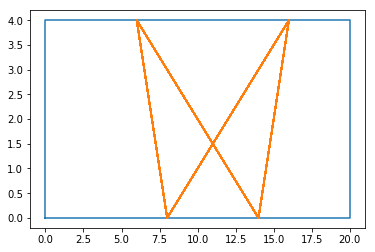

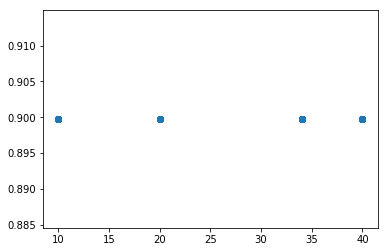

In [11]:

state_list = []
col_state = []
dist_list = []
phi_list = []
wall_dist = cal_dist(table)
num = 75
x_start = 15
y_start = 2
vs,vx,vy = convert_normal_3d(8,2,4)
v = np.array([vs,vx,vy])
gamma = 1
state_list.append(np.array([x_start,y_start,0,0,0,0,0,0]))
col_state.append([x_start, y_start,v[1],v[2]])
for j in range(num):
    wall = 0
    hit_list = []
    for i in table:
#         print(i)
        wall_eq = []
        vect = []

        if(i[2] - i[0] == 0):
            s = i[0]
            wall_eq.append([1,0,0],)
            wall_eq.append([1,0,-v[1]])
            wall_eq.append([0,1,-v[2]])
#             print(wall_eq.shape())
            vect.append(s)
            vect.append(x_start)
            vect.append(y_start)
        #         print(np.linalg.inv(np.array(wall_eq)))
            try:
                hit = np.matmul(np.linalg.inv(np.array(wall_eq)),np.array(vect))
            except Exception:
                wall = wall + 1
                continue
            if(round(hit[2],10) < 0 or round(hit[2],10) == 0):
                wall = wall + 1
                pass
            else:
                hit_list.append(np.append(hit,np.array([wall,i[0],i[1],i[-2],i[-1]])))
                wall = wall + 1
        else:
            m = (i[3] - i [1])/(i[2] - i [0])
            x = i[0] 
            y = i[1]
            b= y - m*x
        #         print(b)
            wall_eq.append([-m,1,0])
            wall_eq.append([1,0,-v[1]])
            wall_eq.append([0,1,-v[2]])
            vect.append(b)
            vect.append(x_start)
            vect.append(y_start)
    #         print(np.array(wall_eq))
    #         print(np.array(vect))
            try:
                hit = np.matmul(np.linalg.inv(np.array(wall_eq)),np.array(vect))
#             print(hit)
            except Exception:
                wall = wall + 1
                continue
            if(round(hit[2],10) < 0 or round(hit[2],10) == 0):
                wall = wall + 1
                pass
            elif((hit[0]>max(i[0],i[2])) or (hit[0]<min(i[0],i[2]))):
                pass
            else:
                hit_list.append(np.append(hit,np.array([wall,i[0],i[1],i[-2],i[-1]])))
                wall = wall + 1
#                 print(hit)
    hit_array = np.array(hit_list)
    state = hit_array[np.argmin(hit_array[:,2]),:]
    state_list.append(state)
    wall_dir = state[-2:]
#     print(wall_dir)
    angle = -np.pi/2
    rotat_mat_inward = np.array([np.cos(angle), -np.sin(angle), np.sin(angle), np.cos(angle)]).reshape(2,2)
    rotat_mat_outward = np.array([np.cos(-1 * angle), -np.sin(-1 *angle), np.sin(-1 * angle),\
                                  np.cos(-1 * angle)]).reshape(2,2)
    outward_norm = np.matmul(rotat_mat_outward,wall_dir)
#     print(outward_norm)
    y_axis = np.array([0,1])
    rx = np.round(rotat_mat_outward[0],3)
    ry = np.round(rotat_mat_outward[0],3)
    rotat_mat_outward_cross = [outward_norm[0],outward_norm[1],0]
#     print(rotat_mat_outward)
    y_axis_cross = [y_axis[0], y_axis[1],0]
#     print(rotat_mat_outward_cross)
#     print(y_axis_cross)
    cross = np.cross(rotat_mat_outward_cross,y_axis_cross)
#     print(cross)
    theta = np.arccos((np.dot(outward_norm,y_axis))/(mag_vect(outward_norm) * mag_vect(y_axis)))
    if (cross[2] == 0 or cross[2] > 0 ):
        theta = theta
    else:
        theta = -1* theta
   
    R = np.array([1,0,0,0,np.cos(theta), np.sin(theta), 0,-1 *np.sin(theta), np.cos(theta)]).reshape(3,3)
    T = np.array([-(1 - gamma**2)/(1 + gamma**2),-(2*gamma)/(gamma**2 + 1),0,-(2*gamma)/(gamma**2 + 1),\
                  (1 - gamma**2)/(1 + gamma**2),0,0,0,-1]).reshape(3,3)
    R_minus = np.array([1,0,0,0,np.cos(-theta), np.sin(-theta), 0,-np.sin(-theta), np.cos(-theta)]).reshape(3,3)
    R_time_T = (np.matmul(R,T))
    T_time_R_minus = np.matmul(R_time_T,R_minus)
    v_reflect = np.matmul(T_time_R_minus, v)
    v = v_reflect
#     print(v)
    norm_wall = np.matmul(rotat_mat_inward,wall_dir)
#     print(norm_wall)
    
    nx,ny = convert_normal(norm_wall[0],norm_wall[1])
    normalized_wall = np.array([nx,ny])
    phi = np.arccos(np.dot(v_reflect[1:],normalized_wall))
    x_start = state[0]
    y_start = state[1]
#     print(x_start,y_start)
#     print(v)
    col_state.append([state[0],state[1],v_reflect[0],v_reflect[1]])
    phi_list.append(np.sin(phi))
    wall_hit = int(state[3])
    some_wall_sum = sum(wall_dist[:wall_hit])
    wall_hit_dist = wall_dist[wall_hit] - (wall_dist[wall_hit] - \
                                           math.sqrt((state[-4] - state[0])**2 + (state[-3] - state[1])**2))
    total_dist = some_wall_sum + wall_hit_dist
    dist_list.append(total_dist)
plt.plot(tab_x, tab_y)
plt.plot(np.array(state_list)[:,0],np.array(state_list)[:,1])
# plt.savefig("random_tri_3_3.png")
plt.show()
plt.scatter(dist_list,phi_list)
plt.show()
# print(col_state)


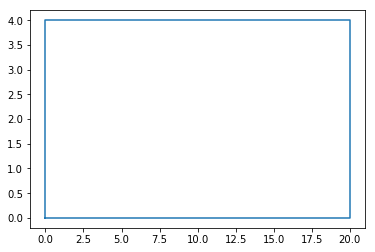

In [28]:
import matplotlib.pyplot as plt
tab_x = []
tab_y = []
table = [[0,0,0,4,0,4],[0,4,20,4,20,0],[20,4,20,0,0,-4],[20,0,0,0,-20,0]]
for i in table:
    tab_x.append(i[0])
    tab_x.append(i[2])
    tab_y.append(i[1])
    tab_y.append(i[3])
plt.plot(tab_x, tab_y)
plt.show()